# Takagi-Sugeno-Kang (TSK) Fuzzy Inference System
**TSK** (Takagi-Sugeno-Kang) Fuzzy Inference Systems are a type of fuzzy logic system commonly used in modeling and control applications. They are named after their creators, J. Takagi, M. Sugeno, and T. Kang.

A tipical fuzzy rule in a TSK FIS has the form:

$R: IF \ x_1\ is\ F_1\ AND/OR\ x_p\ is\ F_p\quad THEN\ y\ =\ f(x_1, \dots, x_p)$

where $y=f(x_1, \dots, x_p)$ is a crisp function in the consequents.
Usually, $f(x_1, \dots, x_p)$ is polynomial but it can be any type of function as long as it can appropiately approximate to the (non)linear problem at hand.

The overall output is taken as the weighted average of each rule's output as follows:

$$z^*=\frac{\sum_{i=1}^n w^i \times z^i}{\sum_{i=1}^n w^i}$$

**Note**: TSK FIS take only crisp values as inputs.

**Kind reminder**
* A linear equation of the **first degree** is an equation that represents a straight line in a coordinate plane. The general form of a linear equation of the first degree is:

$$Ax + By + C = 0$$

Where $A$, $B$, and $C$ are constants, and $x$ and $y$ are the variables. They can also be generalised as follows:

$$y\ =\ f(x_1, \dots, x_p) = k_0+k_1 x_1 +k_2 x_2\dots +k_p x_p$$

* A **0th order** equation, also known as a constant equation, is an equation that does not contain any variables. It is simply a constant value or number. The general form of a 0th order equation is:

$$y\ =\ f(\cdot) = k_0$$

## Zeroth-Order TSK
When $f(\cdot)$ is a constant, we have a Zeroth-Order TSK. Rules in a zeroth-order TSK are of the form:

$R^i: IF \ x_1\ is\ F^i_1\ AND/OR\ x_p\ is\ F^i_p\quad THEN\ y^i\ is\ k^i$

where:
* $F^i_1$ ...$F^i_p$ are FSs in the antecedent
* Each $k^i$ for $i=1…n$ is a constant in the consequent

### Single Rule with Single Antecedent
* Rule: $IF\ x\ is\ F\quad THEN\quad y=f(\cdot)=k_0$
* Input: $X=\{x_1\}$
* Output: $y=k_0$, that is, a constant value.


**Example**

Let us assume we have the following case:
* $f(\cdot)=k_0=3.7$
* Input (age): $x_1=35$

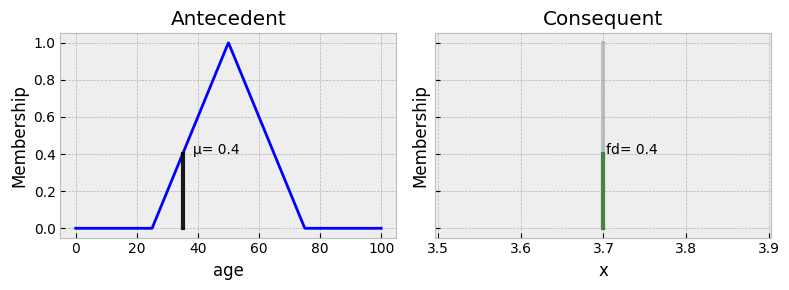

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.style.use('bmh')

def trimf(x, a=25, b=50, c=75):
  # Calculate the membership values
  return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))

x_age = np.linspace(0, 100, 1000)
x1 = 35
x1_mem = trimf(x1)
k0 = 3.7

membership = trimf(x_age)
# Plot the membership function
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

ax1.plot(x_age, membership, 'b', linewidth=2, label='Middled aged MF')
ax1.set_title('Antecedent')
ax1.set_xlabel('age')
ax1.set_ylabel('Membership')
ax1.grid(True)
ax1.plot([x1, x1], [0, x1_mem], 'k', linewidth=3, alpha=0.9)
ax1.annotate('μ= '+str(x1_mem), xy=(x1, x1_mem), xytext=(x1*1.1, x1_mem))

ax2.plot([k0, k0], [0, x1_mem], 'g', linewidth=3, alpha=0.9)
ax2.plot([k0, k0], [0, 1], 'gray', linewidth=3, alpha=0.4)
ax2.annotate('fd= '+str(x1_mem), xy=(k0, x1_mem), xytext=(k0*1.001, x1_mem))
ax2.set_title('Consequent')
ax2.set_xlabel('x')
ax2.set_ylabel('Membership')
ax2.grid(True)

plt.tight_layout()
plt.show()

Given that we obtain $μ=w_1=0.4$ and $y_1=k_0=3.7$ then we can proceed to calculate the aggregated output of this single rule as follows:

\begin{align}
y^*=\frac{w_1\times y_1}{w_1}=\frac{0.4\times 3.7}{0.4}=3.7
\end{align}

### Single Rule with Multiple Antecedents
* Rule: $IF\ x_1\ is\ F_1\ AND\ x_2\ is\ F_2 \quad THEN\quad y=f(\cdot)=k_0$
* Inputs: $X=\{x_1, x_2\}$
* Conclusion: $y=k_0$, that is, a constant value.


**Example**

Let us assume we have the following case:
* $f(\cdot)=k_0=3.7$
* Inputs: $x_1=2, x_2=8$


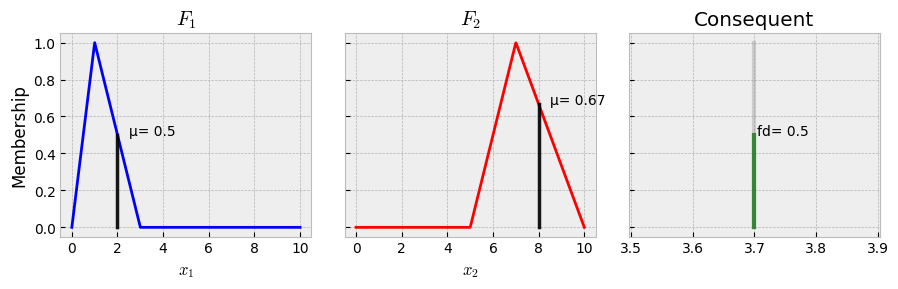

In [ ]:
# parameters of the first triangular membership function
a1, b1, c1 = 0, 1, 3
# parameters of the second triangular membership function
a2, b2, c2 = 5, 7, 10

# Define the range for plotting
x = np.linspace(0, 10, 1000)

# Inputs and membership values
x1, x2 = 2, 8
x1_mem, x2_mem = trimf(x1, a1, b1, c1), trimf(x2, a2, b2, c2)
k0 = 3.7

# Calculate the membership values for the first function
membership1 = trimf(x, a1, b1, c1)
# Calculate the membership values for the second function
membership2 = trimf(x, a2, b2, c2)
# Calculate the implication of both antecedents using their membership values
fd = min(x1_mem, x2_mem) # firing degree

# Create the plot with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3), sharey=True)

# Plot the first triangular membership function
ax1.plot(x, membership1, 'b', linewidth=2)
ax1.set_title('$F_1$')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('Membership')
ax1.grid(True)

# Plot the second triangular membership function
ax2.plot(x, membership2, 'r', linewidth=2)
ax2.set_title('$F_2$')
ax2.set_xlabel('$x_2$')
ax2.grid(True)

ax3.plot([k0, k0], [0, fd], 'g', linewidth=3, alpha=0.9)
ax3.plot([k0, k0], [0, 1], 'gray', linewidth=3, alpha=0.3)
ax3.annotate('fd= '+str(fd), xy=(k0,fd), xytext=(k0*1.001, fd))
ax3.set_title('Consequent')
ax3.grid(True)

ax1.plot([x1, x1], [0, x1_mem], 'k', linewidth=2.5, alpha=0.9)
ax1.annotate('μ= '+str(x1_mem), xy=(x1,x1_mem), xytext=(x1+0.5, x1_mem))

ax2.plot([x2, x2], [0, x2_mem], 'k', linewidth=2.5, alpha=0.9)
ax2.annotate('μ= '+str(round(x2_mem, 2)), xy=(x2,x2_mem), xytext=(x2+0.5, x2_mem))

plt.tight_layout()
plt.show()

Given that we obtain $\mu_{F_1}(x_1)=0.5$, $\mu_{F_2}(x_2)=0.67$ we perform implication by *minimum* (*AND*) such that $w_1=\min(0.5,0.67)=0.5$.

Moreover, given that $y_1=p_0=3.7$ we can proceed to calculate the aggregated output as follows:

\begin{align}
y^*&=\frac{w_1\times y_1}{w_1}\\
&=\frac{0.5\times 3.7}{0.5}\\
&=3.7
\end{align}

### Multiple Rules with Multiple Antecedents
Assume we have the following case with 2 rules:
* $R^1: IF\ x_1\ is\ F_1^1\ AND\ x_2\ is\ F_2^1 \quad THEN\quad y^1=f(\cdot)=k_0^1$
* $R^2: IF\ x_1\ is\ F_1^2\ OR\ x_2\ is\ F_2^2 \quad THEN\quad y^2=f(\cdot)=k_0^2$
* Inputs: $X=\{x_1, x_2\}$
* Output: \begin{align}z^*=\frac{\sum_{i=1}^n w^i \times k^i}{\sum_{i=1}^n w^i}\end{align}

* Here, $k_0^1$ and $k_0^2$ are constant values
* The value of $z^*$ is calculated by the weighted average of $w_1$ and $w_2$ which are the firing strengths of rules $R^1$ and $R^2$ respectively.


**Example**

Let us assume we have the following values as constants for rule outputs and 2 inputs:
* $k_0^1=3.7$
* $k_0^2=8.2$
* Inputs: $x_1=2, x_2=8$

In [ ]:
# parameters of the first triangular membership function
a1, b1, c1 = 0, 2, 4
# parameters of the second triangular membership function
a2, b2, c2 = 4, 7, 10
# parameters of the third triangular membership function
a3, b3, c3 = 1, 3, 5
# parameters of the fourth triangular membership function
a4, b4, c4 = 3, 5, 9

# Define the range for plotting
x = np.linspace(0, 10, 1000)

# Constants in consequents
k1, k2 = 3.7, 8.2

# Inputs and membership values in rules
x1, x2 = 2, 8

# Rule 1
x1_mem_r1, x2_mem_r1 = trimf(x1, a1, b1, c1), trimf(x2, a2, b2, c2)

# Rule 2
x1_mem_r2, x2_mem_r2 = trimf(x1, a3, b3, c3), trimf(x2, a4, b4, c4)

# Calculate firing degrees for each rule
fd1 = min(x1_mem_r1, x2_mem_r1) # AND
fd2 = max(x1_mem_r2, x2_mem_r2) # OR

print('Rule 1')
print('Input 1: ',x1, 'Membership', x1_mem_r1)
print('Input 2: ',x2, 'Membership', x2_mem_r1)
print('Firing degree R1:',fd1)
print('\nRule 2')
print('Input 1: ',x1, 'Membership', x1_mem_r2)
print('Input 2: ',x2, 'Membership', x2_mem_r2)
print('Firing degree R2:',fd2)

# Calculate overall output
z = np.average([k1, k2], weights=[fd1, fd2])
print(z)

Rule 1
Input 1:  2 Membership 1.0
Input 2:  8 Membership 0.6666666666666666
Firing degree R1: 0.6666666666666666

Rule 2
Input 1:  2 Membership 0.5
Input 2:  8 Membership 0.25
Firing degree R2: 0.5
5.628571428571429


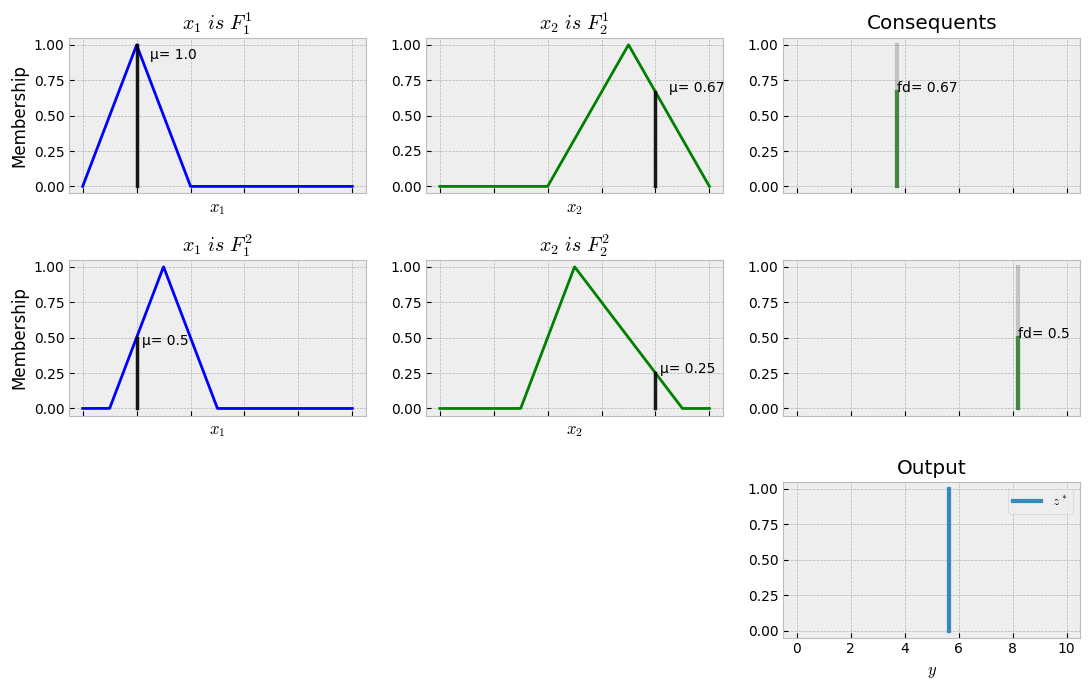

In [ ]:
# Plot
membership1 = trimf(x, a1, b1, c1)
membership2 = trimf(x, a2, b2, c2)
membership3 = trimf(x, a3, b3, c3)
membership4 = trimf(x, a4, b4, c4)

# Create the plot with subplots
fig, ax = plt.subplots(3, 3, figsize=(11, 7), sharex=True)

# Plot the first Triangular membership function
ax[0,0].plot(x, membership1, 'b', linewidth=2)
ax[0,0].set_title('$x_1\ is\ F_1^1$')
ax[0,0].set_xlabel('$x_1$')
ax[0,0].set_ylabel('Membership')
ax[0,0].grid(True)

# Plot the second Triangular membership function
ax[0,1].plot(x, membership2, 'g', linewidth=2)
ax[0,1].set_title('$x_2\ is\ F_2^1$')
ax[0,1].set_xlabel('$x_2$')
ax[0,1].grid(True)

ax[1,0].plot(x, membership3, 'b', linewidth=2)
ax[1,0].set_title('$x_1\ is\ F_1^2$')
ax[1,0].set_xlabel('$x_1$')
ax[1,0].set_ylabel('Membership')
ax[1,0].grid(True)

ax[1,1].plot(x, membership4, 'g', linewidth=2)
ax[1,1].set_title('$x_2\ is\ F_2^2$')
ax[1,1].set_xlabel('$x_2$')
ax[1,1].grid(True)

ax[0,2].plot([k1, k1], [0, fd1], 'g', linewidth=3, alpha=0.9)
ax[0,2].plot([k1, k1], [0, 1], 'gray', linewidth=3, alpha=0.4)
ax[0,2].annotate('fd= '+str(round(fd1,2)), xy=(k1,fd1), xytext=(k1*1.001, fd1))
ax[0,2].set_title('Consequents')
ax[0,2].grid(True)

ax[1,2].plot([k2, k2], [0, fd2], 'g', linewidth=3, alpha=0.9)
ax[1,2].plot([k2, k2], [0, 1], 'gray', linewidth=3, alpha=0.4)
ax[1,2].annotate('fd= '+str(round(fd2,2)), xy=(k2,fd2), xytext=(k2*1.001, fd2))
ax[1,2].grid(True)

# Annotations for antecedents
ax[0,0].plot([x1, x1], [0, x1_mem_r1], 'k', linewidth=2.5, alpha=0.9)
ax[0,0].annotate('μ= '+str(x1_mem_r1), xy=(x1,x1_mem_r1), xytext=(x1+0.5, x1_mem_r1*0.9))
ax[0,1].plot([x2, x2], [0, x2_mem_r1], 'k', linewidth=2.5, alpha=0.9)
ax[0,1].annotate('μ= '+str(round(x2_mem_r1, 2)), xy=(x2,x2_mem_r1), xytext=(x2+0.5, x2_mem_r1))
ax[1,0].plot([x1, x1], [0, x1_mem_r2], 'k', linewidth=2.5, alpha=0.9)
ax[1,0].annotate('μ= '+str(x1_mem_r2), xy=(x1,x1_mem_r2), xytext=(x1*1.1, x1_mem_r2*0.9))
ax[1,1].plot([x2, x2], [0, x2_mem_r2], 'k', linewidth=2.5, alpha=0.9)
ax[1,1].annotate('μ= '+str(x2_mem_r2), xy=(x2,x2_mem_r2), xytext=(x2*1.02, x2_mem_r2))

ax[2,0].set_visible(False)
ax[2,1].set_visible(False)

ax[2,2].plot([z,z], [0,1], linewidth=3, label='$z^*$')
ax[2,2].set_title('Output')
ax[2,2].set_xlabel('$y$')
ax[2,2].legend()

plt.tight_layout()
plt.show()

The value of $z^*$ is calculated as a **weighted average** where the weights are the *firing degrees* obtained by each rule:

\begin{align}
z^*&=\frac{\sum_{i=1}^n w^i \times z^i}{\sum_{i=1}^n w^i}\\
&=\frac{w_1\times y_1+w_2\times y_2}{w_1+w_2}\\
&=\frac{0.67\times 3.7 + 0.5\times 8.2}{0.5+0.67}\approx 5.62
\end{align}

## First-Order TSK
When $f(\cdot)$ is a first order polynomial, the resulting FIS is called a First-order TSK. Rules in a First-order TSK are of the form:

\begin{matrix}
& R^i: IF \ x_1\ is\ F^i_1\ AND/OR\ x_p\ is\ F^i_p\quad THEN\ y^i\ is\ k^i_{p}x_p\dots+ k^i_{1}x_1+k^i_{0} &  \\
& \vdots &  \\
& R^n: IF \ x_1\ is\ F^n_1\ AND/OR\ x_p\ is\ F^n_p\quad THEN\ y^n\ is\ k^n_{p}x_p\dots+ k^n_{1}x_1+k^n_{0} &  &
\end{matrix}

where:
* $F^i_1$ ...$F^i_p$ are FSs in the antecedent for the $i$-th rule.
* Each $k^i_p$ for $i=1…n$ is a constant in the consequent.

### Single Rule with Single Antecedent
* Rule: $IF\ x_1\ is\ F_1\ THEN\ y=k_1x_1+k_0$
* Input: $X=\{x_1\}$

**Example**

Let us assume we have the following case:
* $y=0.5x_1+1$
* Input: $x_1=2.5$

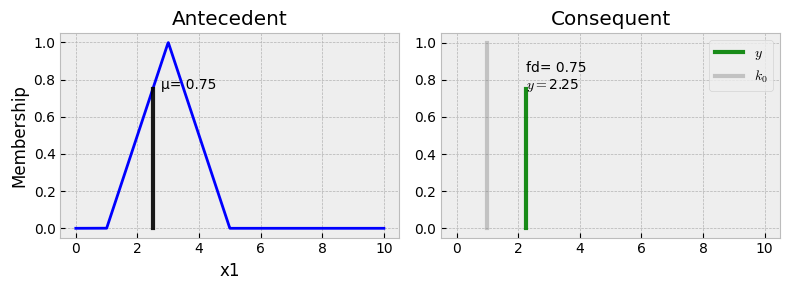

In [ ]:
x = np.linspace(0, 10, 1000)
ks = [1, 0.5] # k0, k1
a, b, c = 1, 3, 5

x1 = 2.5
x1_mem = trimf(x1, a, b, c)
membership = trimf(x, a, b, c)

# output
y = np.dot(ks, [1, x1])

# Plot the membership function
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), sharex=True)
ax1.plot(x, membership, 'b', linewidth=2, label='F1')
ax1.set_title('Antecedent')
ax1.set_xlabel('x1')
ax1.set_ylabel('Membership')
ax1.grid(True)

ax1.plot([x1, x1], [0, x1_mem], 'k', linewidth=3, alpha=0.9)
ax1.annotate('μ= '+str(x1_mem), xy=(x1,x1_mem), xytext=(x1*1.1, x1_mem))

ax2.plot([y, y], [0, x1_mem], 'g', linewidth=3, alpha=0.9, label='$y$')
ax2.plot([ks[0], ks[0]], [0, 1], 'gray', linewidth=3, alpha=0.4, label=r'$k_0$')
ax2.annotate('fd= '+str(x1_mem)+'\n$y=$'+str(y), xy=(y,x1_mem), xytext=(y*1.001, x1_mem))
ax2.set_title('Consequent')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

Given that we obtain $μ=w_1=0.75$ and $y_1=1+0.5x_1=1+0.5\times 2.5=2.25$ then we can proceed to calculate the aggregated output of this single rule as follows:

\begin{align}
y^*&=\frac{w_1\times y_1}{w_1}\\
&=\frac{0.75\times 2.25}{0.75}\\
&=y_1=2.25
\end{align}

### Single Rule with Multiple Antecedents
* Rule: $IF\ x_1\ is\ F_1\ AND\ x_2\ is\ F_2 \quad THEN\quad y=k_2x_2+k_1x_1+k_0$
* Inputs: $X=\{x_1, x_2\}$
* Output: a polynomial function

**Example**

Let us assume we have the following case:
* $y=0.2x_2+0.5x_1+0.7$
* Inputs: $x_1=2, x_2=8$


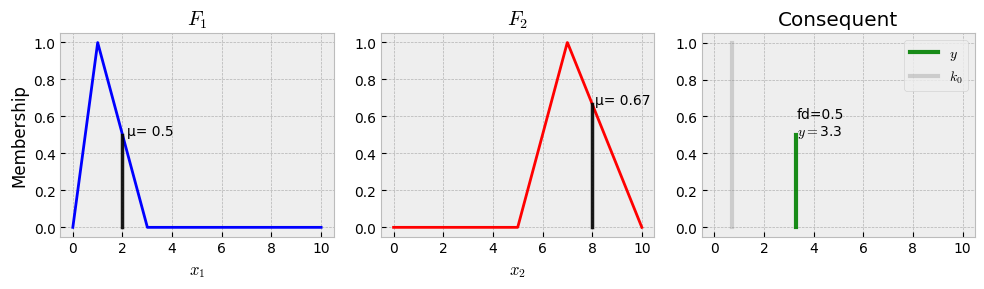

In [ ]:
# parameters of the first triangular membership function
a1, b1, c1 = 0, 1, 3
# parameters of the second triangular membership function
a2, b2, c2 = 5, 7, 10

# Inputs and membership values
x1, x2 = 2, 8
ks = [0.7, 0.5, 0.2] # k0, k1, k2
x1_mem, x2_mem = trimf(x1, a1, b1, c1), trimf(x2, a2, b2, c2)

# output
y = np.dot(ks, [1, x1, x2])

# Calculate the membership values for the first function
membership1 = trimf(x, a1, b1, c1)
# Calculate the membership values for the second function
membership2 = trimf(x, a2, b2, c2)
# Calculate the implication of both antecedents using their membership values
fd = min(x1_mem, x2_mem) # firing degree

# Create the plot with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3), sharex=True)

# Plot the first triangular membership function
ax1.plot(x, membership1, 'b', linewidth=2)
ax1.set_title('$F_1$')
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('Membership')
ax1.grid(True)

# Plot the second triangular membership function
ax2.plot(x, membership2, 'r', linewidth=2)
ax2.set_title('$F_2$')
ax2.set_xlabel('$x_2$')
ax2.grid(True)

ax3.plot([y, y], [0, fd], 'g', linewidth=3, alpha=0.9, label='$y$')
ax3.plot([ks[0], ks[0]], [0, 1], 'gray', linewidth=3, alpha=0.3, label=r'$k_0$')
ax3.annotate('fd='+str(fd)+'\n$y=$'+str(y), xy=(y,fd), xytext=(y*1.01, fd))
ax3.set_title('Consequent')
ax3.legend()
ax3.grid(True)

ax1.plot([x1, x1], [0, x1_mem], 'k', linewidth=2.5, alpha=0.9)
ax1.annotate('μ= '+str(x1_mem), xy=(x1,x1_mem), xytext=(x1+0.2, x1_mem))

ax2.plot([x2, x2], [0, x2_mem], 'k', linewidth=2.5, alpha=0.9)
ax2.annotate('μ= '+str(round(x2_mem, 2)), xy=(x2,x2_mem), xytext=(x2+0.1, x2_mem))

plt.tight_layout()
plt.show()

Given that we obtain $\mu_{F_1}(x_1)=0.5$, $\mu_{F_2}(x_2)=0.67$ we perform implication by *minimum* (*AND*) such that $w_1=\min(0.5,0.67)=0.5$.

Moving on, we obtain:
\begin{align}
y_1&=0.2x_2+0.5x_1+0.7\\
&=0.2\times 8+0.5\times 2+0.7\\
&=3.3
\end{align}

Finally, we can proceed to calculate the aggregated output $y^*$ from this single rule as follows:

\begin{align}
y^*&=\frac{w_1\times y_1}{w_1}\\
&=\frac{0.5\times 3.3}{0.5}\\
&=3.3
\end{align}

### Multiple Rules with Multiple Antecedents
Assume we have the following case with 2 rules:
* $R^1:IF\ x_1\ is\ F_1^1\ AND\ x_2\ is\ F_2^1 \ THEN\quad y^1=k_2^1x_2+k_1^1x_1+k_0^1$
* $R^2:IF\ x_1\ is\ F_1^2\ OR\ x_2\ is\ F_2^2 \ THEN\quad y^2=k_2^2x_2+k_1^2x_1+k_0^2$
* Inputs: $X=\{x_1, x_2\}$
* Output: \begin{align}z^*=\frac{\sum_{i=1}^n w^i \times y^i}{\sum_{i=1}^n w^i}\end{align}

* Here, $y^i,i=1\dots n$ are the outputs from $n$ polynomials


**Example**

Let us assume we have the following values as constants for rule outputs and 2 inputs:
* Consider the following matrix of coefficients in consequents $\textbf{k}$:
\begin{align}
\textbf{k}&=\begin{bmatrix}
k_0^1 & k_1^1 & k_2^1 \\
k_0^2 & k_1^2 & k_2^2
\end{bmatrix} \\
&=\begin{bmatrix}
0.1 & 0.2 & 0.3 \\
0.4 & 0.5 & 0.6
\end{bmatrix}
\end{align}
* $y^1=0.3x_2+0.2x_1+0.1$
* $y^2=0.6x_2+0.5x_1+0.4$
* Inputs: $x_1=3, x_2=8$
* The value of $z^*$ is calculated by calculating the weighted average taking $w^1$ and $w^2$ which are the firing strengths of rules $R^1$ and $R^2$ respectively.

In [ ]:
# parameters of the first triangular membership function
a1, b1, c1 = 0, 2, 4
# parameters of the second triangular membership function
a2, b2, c2 = 4, 7, 10
# parameters of the third triangular membership function
a3, b3, c3 = 1, 3, 5
# parameters of the fourth triangular membership function
a4, b4, c4 = 3, 5, 9

# Define the range for plotting
x = np.linspace(0, 10, 1000)

# Coefficients in consequents
# k0, k1, k2
k = np.array([[.1, .2, .3], [.4, .5, .6]])

# Inputs and membership values in rules
x1, x2 = 3, 8

# Rule 1
x1_mem_r1, x2_mem_r1 = trimf(x1, a1, b1, c1), trimf(x2, a2, b2, c2)

# Rule 2
x1_mem_r2, x2_mem_r2 = trimf(x1, a3, b3, c3), trimf(x2, a4, b4, c4)

# Calculate firing degrees for each rule
fd1 = min(x1_mem_r1, x2_mem_r1) # AND
fd2 = max(x1_mem_r2, x2_mem_r2) # OR

print('Rule 1')
print('Input 1: ',x1, 'Membership', x1_mem_r1)
print('Input 2: ',x2, 'Membership', x2_mem_r1)
print('Firing degree R1:',fd1)
print('\nRule 2')
print('Input 1: ',x1, 'Membership', x1_mem_r2)
print('Input 2: ',x2, 'Membership', x2_mem_r2)
print('Firing degree R2:',fd2)

# Calculate ys
y1 = np.dot(k[0], [1, x1, x2])
y2 = np.dot(k[1], [1, x1, x2])

# Calculate overall output
z = np.average([y1, y2], weights=[fd1, fd2])
print('y1=', y1)
print('y2=', y2)
print('z=', z)

Rule 1
Input 1:  3 Membership 0.5
Input 2:  8 Membership 0.6666666666666666
Firing degree R1: 0.5

Rule 2
Input 1:  3 Membership 1.0
Input 2:  8 Membership 0.25
Firing degree R2: 1.0
y1= 3.1
y2= 6.699999999999999
z= 5.5


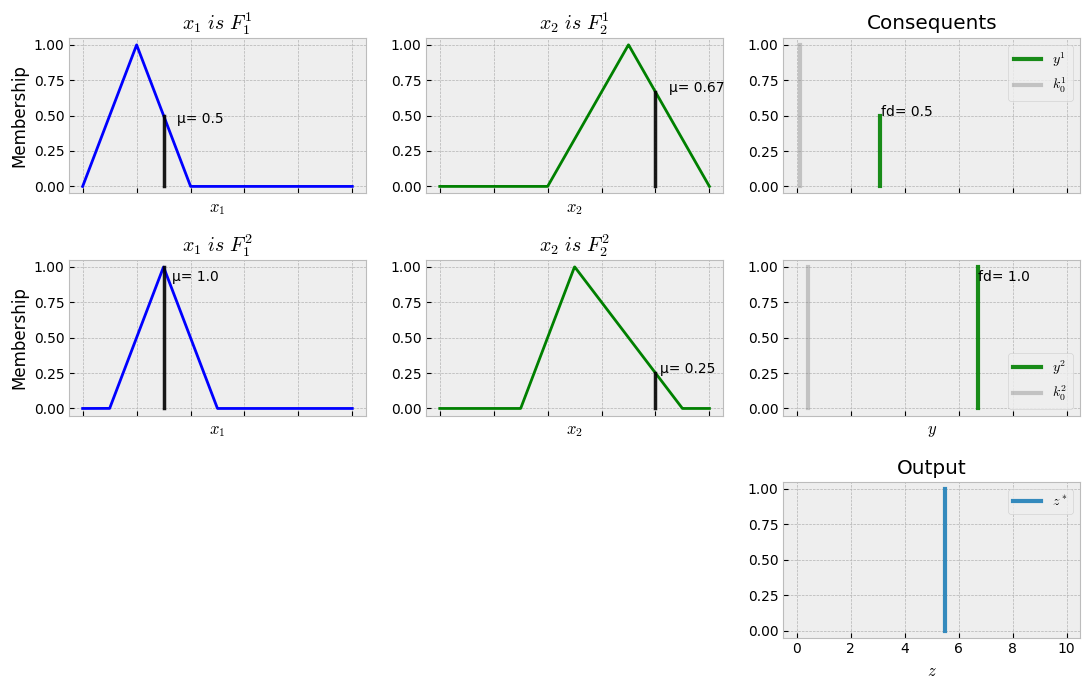

In [ ]:
# Plot
membership1 = trimf(x, a1, b1, c1)
membership2 = trimf(x, a2, b2, c2)
membership3 = trimf(x, a3, b3, c3)
membership4 = trimf(x, a4, b4, c4)

# Create the plot with subplots
fig, ax = plt.subplots(3, 3, figsize=(11, 7), sharex=True)

# Plot the first Triangular membership function
ax[0,0].plot(x, membership1, 'b', linewidth=2)
ax[0,0].set_title('$x_1\ is\ F_1^1$')
ax[0,0].set_xlabel('$x_1$')
ax[0,0].set_ylabel('Membership')
ax[0,0].grid(True)

# Plot the second Triangular membership function
ax[0,1].plot(x, membership2, 'g', linewidth=2)
ax[0,1].set_title('$x_2\ is\ F_2^1$')
ax[0,1].set_xlabel('$x_2$')
ax[0,1].grid(True)

ax[1,0].plot(x, membership3, 'b', linewidth=2)
ax[1,0].set_title('$x_1\ is\ F_1^2$')
ax[1,0].set_xlabel('$x_1$')
ax[1,0].set_ylabel('Membership')
ax[1,0].grid(True)

ax[1,1].plot(x, membership4, 'g', linewidth=2)
ax[1,1].set_title('$x_2\ is\ F_2^2$')
ax[1,1].set_xlabel('$x_2$')
ax[1,1].grid(True)

ax[0,2].plot([y1, y1], [0, fd1], 'g', linewidth=3, alpha=0.9, label='$y^1$')
ax[0,2].plot([k[0,0], k[0,0]], [0, 1], 'gray', linewidth=3, alpha=0.4,label=r'$k_0^1$')
ax[0,2].annotate('fd= '+str(round(fd1,2)), xy=(y1,fd1), xytext=(y1*1.001, fd1))
ax[0,2].set_title('Consequents')
ax[0,2].legend()
ax[0,2].grid(True)

ax[1,2].plot([y2, y2], [0, fd2], 'g', linewidth=3, alpha=0.9, label='$y^2$')
ax[1,2].plot([k[1,0], k[1,0]], [0, 1], 'gray', linewidth=3, alpha=0.4,label=r'$k_0^2$')
ax[1,2].annotate('fd= '+str(round(fd2,2)), xy=(y2,fd2), xytext=(y2*1.001, fd2*0.9))
ax[1,2].legend(loc='lower right')
ax[1,2].set_xlabel('$y$')
ax[1,2].grid(True)

# Annotations for antecedents
ax[0,0].plot([x1, x1], [0, x1_mem_r1], 'k', linewidth=2.5, alpha=0.9)
ax[0,0].annotate('μ= '+str(x1_mem_r1), xy=(x1,x1_mem_r1), xytext=(x1+0.5, x1_mem_r1*0.9))

ax[0,1].plot([x2, x2], [0, x2_mem_r1], 'k', linewidth=2.5, alpha=0.9)
ax[0,1].annotate('μ= '+str(round(x2_mem_r1, 2)), xy=(x2,x2_mem_r1), xytext=(x2+0.5, x2_mem_r1))
ax[1,0].plot([x1, x1], [0, x1_mem_r2], 'k', linewidth=2.5, alpha=0.9)
ax[1,0].annotate('μ= '+str(x1_mem_r2), xy=(x1,x1_mem_r2), xytext=(x1*1.1, x1_mem_r2*0.9))
ax[1,1].plot([x2, x2], [0, x2_mem_r2], 'k', linewidth=2.5, alpha=0.9)
ax[1,1].annotate('μ= '+str(x2_mem_r2), xy=(x2,x2_mem_r2), xytext=(x2*1.02, x2_mem_r2))

ax[2,0].set_visible(False)
ax[2,1].set_visible(False)

ax[2,2].plot([z,z], [0,1], linewidth=3, label='$z^*$')
ax[2,2].set_title('Output')
ax[2,2].set_xlabel('$z$')
ax[2,2].legend()

plt.tight_layout()
plt.show()